In [2]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn

plt.rc("figure", dpi=100)

# Mediciones del periodo

¿Midieron con la función de vuelta o *lap*?

Medición | Tiempo | Lap
--- | --- | ---
1 | 1.00 | -
2 | 2.10 | 1.10
3 | 3.15 | 1.05
4 | 4.05 | 0.90

# Correlaciones

## Propagación de errores

Asume que las mediciones son **independientes**.

$$ g(T, L) = (2\pi)^2 \, \frac{L}{T^2} $$

$$ \Delta g = \sqrt{\left(\frac{\partial g}{\partial T} \Delta T\right)^2 + \left(\frac{\partial g}{\partial L} \Delta L\right)^2} $$

$$ \sigma_g^2 = \left(\frac{\partial g}{\partial T} \sigma_T\right)^2 + \left(\frac{\partial g}{\partial L} \sigma_L\right)^2 $$

Cuando no son independientes, hay que usar la formula completa:

$$ \sigma_g^2
= \left(\frac{\partial g}{\partial T} \, \sigma_T\right)^2
+ \left(\frac{\partial g}{\partial L} \, \sigma_L\right)^2
+ \left(2 \, \frac{\partial g}{\partial L} \frac{\partial g}{\partial T} \, \text{cov}(L, T)\right)
$$

donde $\text{cov}(L, T)$ es la **covarianza** entre $L$ y $T$.

## Ejemplo independiente

Vamos a generar dos variables aleatorias $x$ e $y$, y calcular su suma $z = x + y$:

In [4]:
N = 10_000
x = np.random.normal(loc=10, scale=3, size=N)
y = np.random.normal(loc=20, scale=4, size=N)
z = x + y

x, y, z

(array([13.46230234, 11.12666458, 12.45285959, ..., 11.38651391,
        15.28443013,  9.99005001]),
 array([21.87171375, 25.75470841, 14.67787048, ..., 17.55925769,
        18.53839287, 18.97249434]),
 array([35.33401609, 36.88137299, 27.13073007, ..., 28.94577161,
        33.822823  , 28.96254436]))

¿Dónde tiene que estar centrada $x$, y con que ancho? ¿e $y$? ¿y $z$?

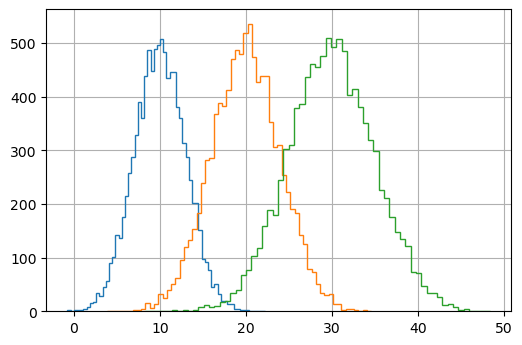

In [5]:
for variable in (x, y, z):
    plt.hist(variable, bins="fd", histtype="step")
    
plt.grid()

### Promedio

El promedio de la suma es la suma de los promedios:

$$ \begin{align}
z &= x + y \\
\bar{z} &= \bar{x} + \bar{y}
\end{align} $$

Chequeemoslo:

In [6]:
x.mean(), y.mean()

(9.980466716897235, 19.951441358366928)

In [7]:
x.mean() + y.mean(), z.mean()

(29.93190807526416, 29.93190807526416)

### Desviación estándar

La desviación estandar de la suma, ¿es la suma de las desviaciones estándar?

Es decir, ¿vale esto:

$$ \begin{align}
z &= x + y \\
\sigma_{z} &= \sigma_{x} + \sigma_{y}
\end{align} $$

?

Chequeemoslo:

In [8]:
x.std(), y.std()

(2.9748256850033306, 3.980070992705329)

In [9]:
x.std() + y.std(), z.std()

(6.95489667770866, 4.9883715493344525)

¡No, no vale!

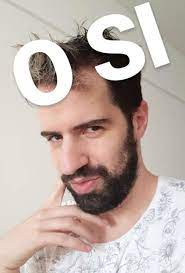

¡No, no vale! Hay que usar la formula de propagación:

$$ \begin{align}
z &= x + y \\
\text{entonces} \\
\sigma_z^2
&= \left( \frac{\partial z}{\partial x} \sigma_x \right)^2 + \left( \frac{\partial z}{\partial y} \sigma_y \right)^2 \\
\\
&= \sigma_x^2 + \sigma_y^2
\end{align} $$

In [10]:
x.std()**2 + y.std()**2, z.std()**2

(24.690552963129917, 24.883850714209405)

O, pasando la raiz, porque siempre nos interesa saber la desviación estándar:

$$ \sigma_z = \sqrt{\sigma_x^2 + \sigma_y^2} $$

In [11]:
np.sqrt(x.std()**2 + y.std()**2), z.std()

(4.968958941582222, 4.9883715493344525)

## Ejemplo no independiente

Ahora vamos a generar un ejemplo no independiente. Para eso, vamos a generar 3 tiempos independientes ($t_0$, $t_1$, $t_2$) y calcular sus diferencias:

$$ \begin{align}
T_1 &= t_1 - t_0 \\
T_2 &= t_2 - t_1
\end{align} $$

Como $T_1$ y $T_2$ comparten un valor $t_1$, es decir, se calculan a partir de la misma medición, van a estar correlacionados.

In [12]:
N = 10_000
t0 = np.random.normal(loc=10, scale=1, size=N)
t1 = np.random.normal(loc=20, scale=1, size=N)
t2 = np.random.normal(loc=30, scale=1, size=N)

T1 = t1 - t0
T2 = t2 - t1

Miremos algunos valores:

In [15]:
i = 2
print(f"{t0[i]=:.2f}")
print(f"{t1[i]=:.2f}")
print(f"{t2[i]=:.2f}")
print()
print(f"{T1[i]=:.2f}")
print(f"{T2[i]=:.2f}")

t0[i]=11.00
t1[i]=20.48
t2[i]=29.98

T1[i]=9.48
T2[i]=9.51


Hagamos un histograma de $T_1$ y $T_2$:

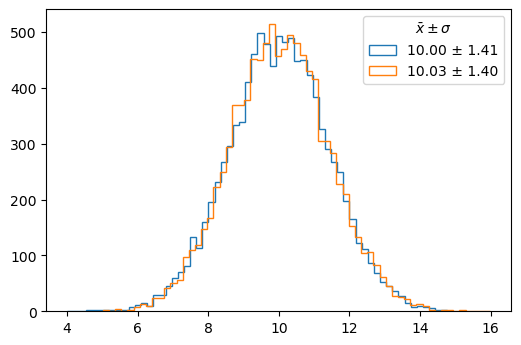

In [16]:
for t in (T1, T2):
    plt.hist(t, bins="fd", histtype="step", label=f"{t.mean():.2f} ± {t.std():.2f}")
    
plt.legend(title=r"$\bar{x} \pm \sigma$")

Como son iguales, podríamos "juntarlos" calculando un promedio:

In [17]:
T = (T1 + T2) / 2

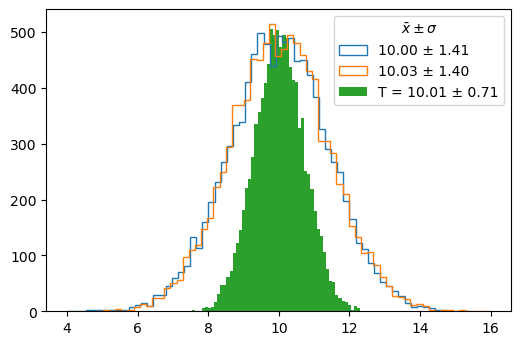

In [18]:
for t in (T1, T2):
    plt.hist(t, bins="fd", histtype="step", label=f"{t.mean():.2f} ± {t.std():.2f}")

plt.hist(T, bins="fd", label=f"T = {T.mean():.2f} ± {T.std():.2f}");
plt.legend(title=r"$\bar{x} \pm \sigma$")

¿Está bien ese valor de desviación estándar para el promedio?

Es decir, ¿era el que esperabamos?

Hagamos la cuenta:

$$ \begin{align}
\bar{T} &= \frac{T_1 + T_2}{2} \\
\\
\sigma_\bar{T}^2
&= \left( \frac{1}{2} \right)^2 \left( \sigma_{T_1}^2 + \sigma_{T_2}^2 \right) \\
&= \left( \frac{1}{2} \right)^2 \left( \sqrt{2}^2 + \sqrt{2}^2 \right) \\
&= \left( \frac{1}{4} \right) \left( 2 + 2 \right) \\
&= 1 \\
\end{align} $$

Nota: como $\sigma_{T_1} = \sigma_{T_2}$, podiamos haber usado directamnete la fórmula del promedio para $N$ mediciones del otro día:

$$ \sigma_\bar{T} = \frac{\sigma_{T_1}}{\sqrt{N}} = \frac{\sqrt{2}}{\sqrt{2}} = 1 $$

### Opción 1: escribirlo en términos de variables independientes

$$ \begin{align}
\bar{T}
&= \frac{1}{2} \Big( T_1 + T_2 \Big) \\
\\
&= \frac{1}{2} \Big( (t_1 - t_0) + (t_2 - t_1) \Big) \\
\\
&= \frac{1}{2} \Big( t_2 - t_0 \Big) \\
\\
\text{entonces} \\
\sigma_\bar{T}^2
&= \left( \frac{1}{2} \right)^2 \left( \sigma_{t_2}^2 + \sigma_{t_0}^2 \right) \\
&= \left( \frac{1}{2} \right)^2 \left( 1^2 + 1^2 \right) \\
&= \frac{1}{2} \\
\\
\sigma_\bar{T} &= \frac{1}{\sqrt{2}} = 0.70\ldots
\end{align} $$

### Opción 2: usar la formula con la covarianza

$$ \begin{align}
\bar{T}
&= \frac{1}{2} \Big( T_1 + T_2 \Big) \\
\text{entonces} \\
\sigma_\bar{T}^2
&= \left(\frac{\partial T}{\partial T_1} \, \sigma_{T_1}\right)^2
+ \left(\frac{\partial T}{\partial T_2} \, \sigma_{T_2}\right)^2
+ \left(2 \, \frac{\partial T}{\partial T_1} \frac{\partial T}{\partial T_2} \, \text{cov}(T_1, T_2)\right)
\\ \\
&= \left(\frac{1}{2} \, \sigma_{T_1}\right)^2
+ \left(\frac{1}{2} \, \sigma_{T_2}\right)^2
+ \left(2 \, \frac{1}{2} \cdot \frac{1}{2} \, \text{cov}(T_1, T_2)\right)
\\ \\
&= \frac{1}{4} \, \Big( \sigma_{T_1}^2 + \sigma_{T_2}^2 + 2 \, \text{cov}(T_1, T_2) \Big)
\end{align} $$

¿Pero cómo calculamos covarianza?

La desviación estándar la calculabamos:

$$ \sigma_x = \sqrt{\frac{1}{N} \sum_i (x_i - \bar{x})^2} $$

In [19]:
np.std(T1)

1.4112157535381018

La varianza era el cuadrado:

$$ \begin{align}
\sigma_x^2
&= \frac{1}{N} \sum_i (x_i - \bar{x})^2 \\
\text{separando el cuadrado} \\
&= \frac{1}{N} \sum_i (x_i - \bar{x}) \, (x_i - \bar{x})
\end{align} $$

In [20]:
np.std(T1)**2, np.var(T1)

(1.9915299030341125, 1.9915299030341127)

La covarianza es:
    
$$ \text{Cov}(X, Y) = \sigma_{xy} = \frac{1}{N} \sum_i (x_i - \bar{x}) \, (y_i - \bar{y}) $$

In [21]:
np.cov(T1, T2)

array([[ 1.99172908, -0.97812561],
       [-0.97812561,  1.96416238]])

In [22]:
np.var(T1), np.var(T2)

(1.9915299030341127, 1.963965958824232)

Volviendo a la formula:

$$ \sigma_\bar{T}^2 = \frac{1}{4} \, \Big( \sigma_{T_1}^2 + \sigma_{T_2}^2 + 2 \, \text{cov}(T_1, T_2) \Big) $$

In [23]:
np.sqrt((np.var(T1) + np.var(T2) + 2 * np.cov(T1, T2)[0,1]) / 4)

0.7069732398670732

Que es igual a la desviación estandar $\sigma_\bar{T}$ de $\bar{T}$:

In [24]:
T.std()

0.7070078275157241

## Gráficamente

Al ver los histogramas por separado, nos estamos perdiendo esta dependencia conjunta entre $T_1$ y $T_2$.

In [26]:
T1

array([ 9.91343263, 10.45554529,  9.47934406, ...,  8.96402975,
        8.82455325, 11.06999922])

In [27]:
T2

array([11.53237023, 10.89641992,  9.50676962, ..., 12.3639776 ,
        8.81618754,  8.34634683])

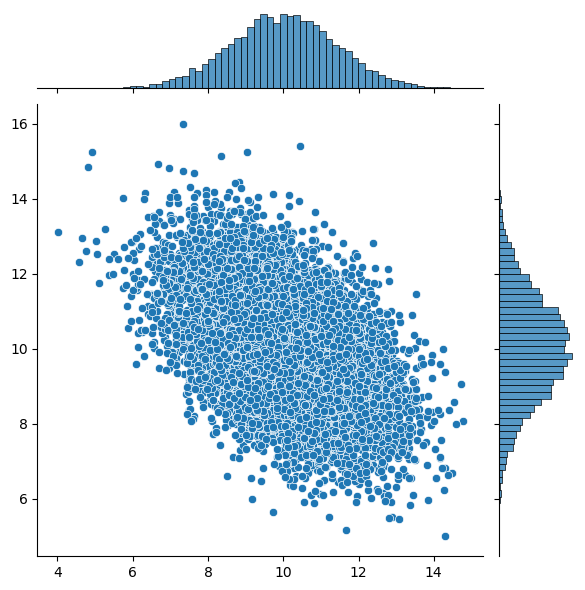

In [25]:
seaborn.jointplot(x=T1, y=T2)

Mientras que la desviación estándar mide el ancho de los histogramas de los bordes,

la covarianza mide "el ángulo" de la elipse.

Para variables independientes, la elipse está "acostada".

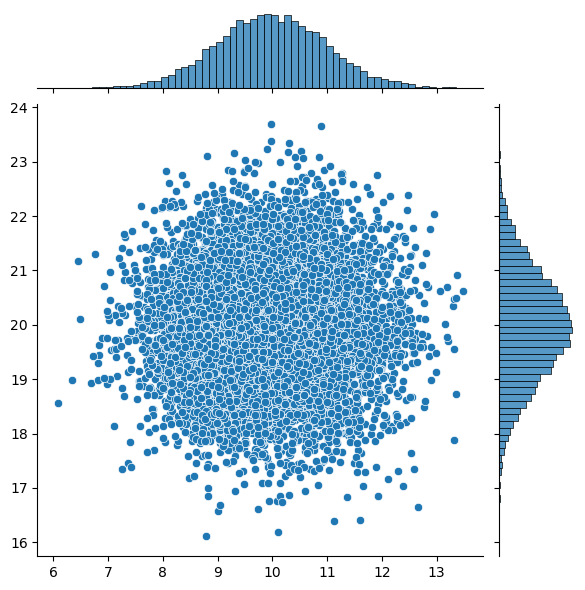

In [28]:
seaborn.jointplot(x=t0, y=t1)

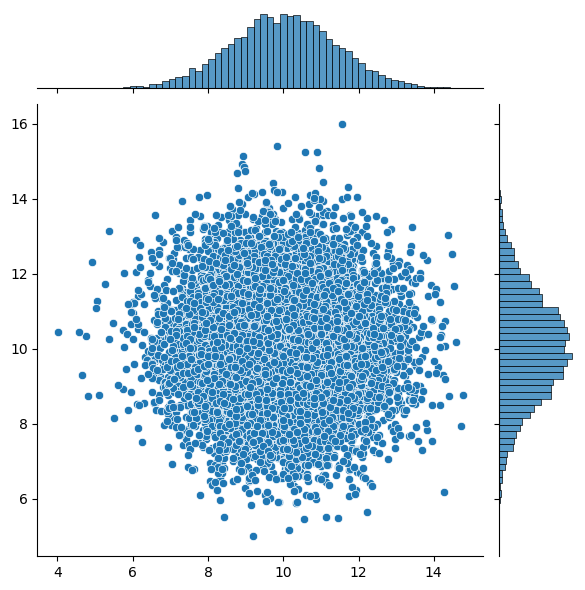

In [29]:
T2_desordenado = np.random.choice(T2, size=T2.size, replace=False)

seaborn.jointplot(x=T1, y=T2_desordenado)

## Conclusión

Si las variables no son independientes, hay que tener en cuenta la formula de propagación completa.

Capaz en esta sección estan pensando: "Mauro nos quiere hacer corregir moneditas, tampoco daba tan mal.pensando"

Al final de la clase les cuento el resultado de una tesis que fue "no se puede distinguir entre tal y tal comportamiento", mientras que sí se podia si se tenía en cuenta la correlación.

## Simulación en Colab

Vamos a probar diferentes formas de analizar 

https://colab.research.google.com/drive/1Sx0ebuxB-KhCTeTo1AUfnlClHBTh1JcP#scrollTo=ozA2WXGO-3g0

## Mis resultados

In [41]:
def distribucion_periodos(funcion_calcular_periodo,
                          *,
                          periodo_real=2,
                          N_periodos_medidos=10,
                          error_por_medicion=0.1,
                          repetir_N_veces=10_000):
    """Devuelve una distribución de periodos calculados a partir de un dado analisis.

    funcion_calcular_periodo: funcion(x, y) que toma x=numero_de_periodo e y=tiempo_medido.
        Ojo, "y" no es periodo_medido.
    periodo_real: número.
    N_periodos_medidos: cuantos periodos seguidos se midieron con la función lap del cronometro.
    error_por_medicion: la desviacion estandar de nuestro error de medición.
    repetir_N_veces: repite este experimento multiples veces. El tamaño del vector de la salida depende de este valor.
    """

    numero_de_periodo = np.arange(N_periodos_medidos)
    tiempo_real = periodo_real * numero_de_periodo

    periodos = np.empty(repetir_N_veces)
    for i in range(repetir_N_veces):
        # Simulo medir agregando ruido
        tiempo_medido = np.random.normal(tiempo_real, scale=error_por_medicion)
        # Calculo el periodo para esa serie de mediciones
        periodos[i] = funcion_calcular_periodo(numero_de_periodo, tiempo_medido)

    return periodos

In [42]:
def primer_periodo(x, y):
    return y[1] - y[0]

def promedio_pares(x, y):
    return np.diff(y)[::2].mean()

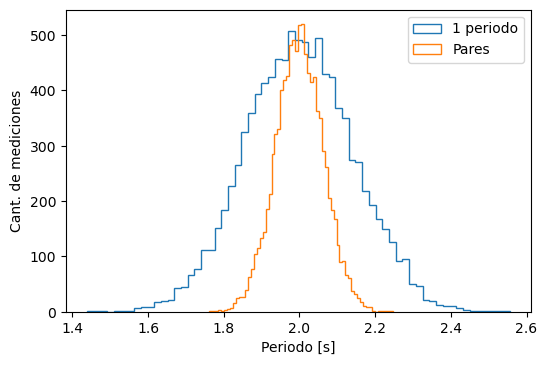

In [43]:
periodos_1 = distribucion_periodos(primer_periodo)
periodos_pares = distribucion_periodos(promedio_pares)
    
plt.hist(periodos_1, bins="fd", histtype="step", label="1 periodo");
plt.hist(periodos_pares, bins="fd", histtype="step", label="Pares");

plt.xlabel("Periodo [s]")
plt.ylabel("Cant. de mediciones")
plt.legend()